In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [100]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
data.shape

(303, 14)

In [102]:
data.duplicated().sum()

1

In [103]:
data = data.drop_duplicates().reset_index(drop=True)

In [104]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [105]:
for feature in data.columns:  
    print(feature)
    print(data[feature].unique(),"\n") 

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

sex
[1 0] 

cp
[3 2 1 0] 

trtbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 

fbs
[1 

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [107]:
'''binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
          'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for column in binary_columns:
    data[column] = data[column].replace({'No': 0, 'Yes': 1})'''

"binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', \n          'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']\nfor column in binary_columns:\n    data[column] = data[column].replace({'No': 0, 'Yes': 1})"

In [108]:
'''def convert_range_to_mean(range_str):
    if 'or older' in range_str:
        return int(range_str.split()[0])
    else:
        range_values = range_str.split('-')
        return (int(range_values[0]) + int(range_values[1])) / 2

data['AgeCategory'] = data['AgeCategory'].apply(convert_range_to_mean)'''

"def convert_range_to_mean(range_str):\n    if 'or older' in range_str:\n        return int(range_str.split()[0])\n    else:\n        range_values = range_str.split('-')\n        return (int(range_values[0]) + int(range_values[1])) / 2\n\ndata['AgeCategory'] = data['AgeCategory'].apply(convert_range_to_mean)"

In [109]:
from sklearn.preprocessing import MinMaxScaler
data_numeric_columns = ['age', 'trtbps', 'chol', 'thalachh','oldpeak']
scaler = MinMaxScaler()
data[data_numeric_columns] = scaler.fit_transform(data[data_numeric_columns])

In [110]:
'''GenHealth_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
data['GenHealth'] = data['GenHealth'].map(GenHealth_mapping)'''

"GenHealth_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}\ndata['GenHealth'] = data['GenHealth'].map(GenHealth_mapping)"

In [111]:
'''cols = ['Diabetic','Sex', 'Race']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)'''

"cols = ['Diabetic','Sex', 'Race']\ndata[cols] = data[cols].apply(LabelEncoder().fit_transform)"

In [112]:
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1
5,0.583333,1,0,0.433962,0.150685,0,1,0.587786,0,0.064516,1,0,1,1
6,0.562500,0,1,0.433962,0.383562,0,0,0.625954,0,0.209677,1,0,2,1
7,0.312500,1,1,0.245283,0.312785,0,1,0.778626,0,0.000000,2,0,3,1
8,0.479167,1,2,0.735849,0.166667,1,1,0.694656,0,0.080645,2,0,3,1
9,0.583333,1,2,0.528302,0.095890,0,1,0.786260,0,0.258065,2,0,2,1


In [113]:
x = data.drop('output', axis=1).values
y = data['output'].values

In [114]:
'''labels = ['0=Non Heart Disease', '1=Heart Disease']
colors = ['royalblue','red']
values = np.bincount(y.astype(int)).tolist()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])
fig.update_traces(hoverinfo='label+value', textfont_size=15, marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='HeartDisease', x=0.5, y=0.5, font_size=15, showarrow=False)])
fig.show()'''

"labels = ['0=Non Heart Disease', '1=Heart Disease']\ncolors = ['royalblue','red']\nvalues = np.bincount(y.astype(int)).tolist()\nfig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])\nfig.update_traces(hoverinfo='label+value', textfont_size=15, marker=dict(colors=colors))\nfig.update_layout(annotations=[dict(text='HeartDisease', x=0.5, y=0.5, font_size=15, showarrow=False)])\nfig.show()"

In [115]:
'''print("採樣前資料分布:")
print(data['HeartDisease'].value_counts())'''

'print("採樣前資料分布:")\nprint(data[\'HeartDisease\'].value_counts())'

In [116]:
'''from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)'''

'from imblearn.over_sampling import RandomOverSampler\nsm = RandomOverSampler(random_state=42)\nx_resampled, y_resampled = sm.fit_resample(x, y)'

In [117]:
'''labels = ['0=Non Heart Disease', '1=Heart Disease']
values = np.bincount(y_resampled.astype(int)).tolist()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])
fig.update_traces(hoverinfo='label+value', textfont_size=15, marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='HeartDisease', x=0.5, y=0.5, font_size=15, showarrow=False)])
fig.show()'''

"labels = ['0=Non Heart Disease', '1=Heart Disease']\nvalues = np.bincount(y_resampled.astype(int)).tolist()\nfig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])\nfig.update_traces(hoverinfo='label+value', textfont_size=15, marker=dict(colors=colors))\nfig.update_layout(annotations=[dict(text='HeartDisease', x=0.5, y=0.5, font_size=15, showarrow=False)])\nfig.show()"

In [118]:
'''print("採樣後資料分布:")
print(pd.Series(y_resampled).value_counts())'''

'print("採樣後資料分布:")\nprint(pd.Series(y_resampled).value_counts())'

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

'''combined_train_df = pd.concat([pd.DataFrame(y_train), pd.DataFrame(x_train)], axis=1)
combined_test_df = pd.concat([pd.DataFrame(y_test), pd.DataFrame(x_test)], axis=1)'''



columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 
           'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

'''combined_train_df.columns = columns
combined_test_df.columns = columns

combined_train_df.to_csv('combined_train_data.csv', index=False, columns=columns)
combined_test_df.to_csv('combined_test_data.csv', index=False, columns=columns)'''

"combined_train_df.columns = columns\ncombined_test_df.columns = columns\n\ncombined_train_df.to_csv('combined_train_data.csv', index=False, columns=columns)\ncombined_test_df.to_csv('combined_test_data.csv', index=False, columns=columns)"

In [120]:
'''from sklearn.metrics import matthews_corrcoef
cols = data.columns
corr = []
for col in cols:
    if col in binary_columns:
        corr.append(matthews_corrcoef(data['HeartDisease'], data[col]))
    else:
        corr.append(data['HeartDisease'].corr(data[col]))
correlation = pd.DataFrame(list(zip(cols, corr)), columns=['Variables','Corr_with_HeartDisease'])
correlation.drop(index=correlation.index[:1], axis=0, inplace=True)
correlation'''

"from sklearn.metrics import matthews_corrcoef\ncols = data.columns\ncorr = []\nfor col in cols:\n    if col in binary_columns:\n        corr.append(matthews_corrcoef(data['HeartDisease'], data[col]))\n    else:\n        corr.append(data['HeartDisease'].corr(data[col]))\ncorrelation = pd.DataFrame(list(zip(cols, corr)), columns=['Variables','Corr_with_HeartDisease'])\ncorrelation.drop(index=correlation.index[:1], axis=0, inplace=True)\ncorrelation"

In [121]:
'''correlation['colors'] = ['#F0073B' if float(x) <= 0 else '#CB3579' for x in correlation['Corr_with_HeartDisease']]
correlation = correlation.sort_values(ascending=True, by=['Corr_with_HeartDisease']) 
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=correlation.Variables, xmin=0, xmax=correlation.Corr_with_HeartDisease, color=correlation.colors,  linewidth=5)
plt.grid()
plt.show()'''

"correlation['colors'] = ['#F0073B' if float(x) <= 0 else '#CB3579' for x in correlation['Corr_with_HeartDisease']]\ncorrelation = correlation.sort_values(ascending=True, by=['Corr_with_HeartDisease']) \nplt.figure(figsize=(14,10), dpi=80)\nplt.hlines(y=correlation.Variables, xmin=0, xmax=correlation.Corr_with_HeartDisease, color=correlation.colors,  linewidth=5)\nplt.grid()\nplt.show()"

In [122]:
accuracy = []
precision = []
recall = []
f1 = []
auc = []
feature_selection_count = Counter()

def evaluate_model(model, y_true, y_pred):
    accuracy.append(accuracy_score(y_true, y_pred))
    precision.append(precision_score(y_true, y_pred))
    recall.append(recall_score(y_true, y_pred))
    f1.append(f1_score(y_true, y_pred))
    auc.append(roc_auc_score(y_true, y_pred))

1 features  =  0.7511670480549199
2 features  =  0.7032723112128145
3 features  =  0.801475972540046
4 features  =  0.7806864988558353
5 features  =  0.7989931350114416
6 features  =  0.811350114416476
7 features  =  0.8035697940503432
8 features  =  0.8271395881006864
9 features  =  0.8227917620137302
10 features  =  0.8166132723112127
11 features  =  0.8060869565217391
12 features  =  0.7992219679633866
最佳的 max_features 值: 8
對應的交叉驗證分數: 0.8271395881006864

選擇的特徵: ['age' 'cp' 'thalachh' 'exng' 'oldpeak' 'slp' 'caa' 'thall']

Accuracy_score: 0.8351648351648352
Precision_score: 0.8269230769230769
Recall_score: 0.8775510204081632
F1-score: 0.8514851485148514



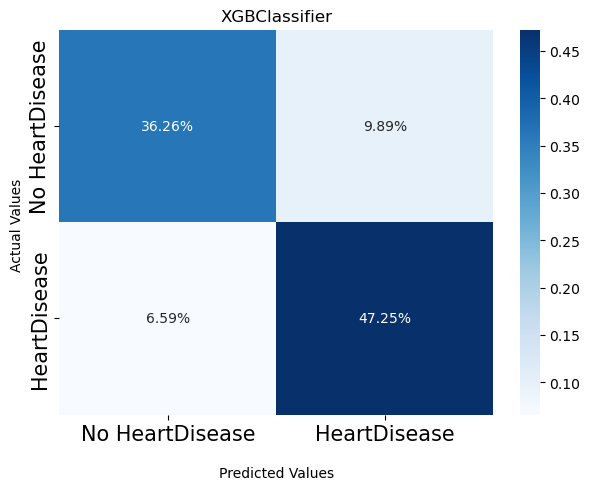

In [123]:
xgb = XGBClassifier(n_estimators= 20 , max_depth= 2 , learning_rate = 0.1)

max_features_range = range(1, 13)
best_max_features = None
best_score = 0


for max_features in max_features_range:
    selector = SelectFromModel(estimator=xgb, threshold=-np.inf, max_features=max_features)
    selector.fit(x_train, y_train)
    x_train_selected = selector.transform(x_train)
    
    scores = cross_val_score(XGBClassifier(n_estimators= 50 , max_depth= 3 , learning_rate = 0.1), 
                             x_train_selected, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    print(max_features,'features',' = ',mean_score)
    if mean_score > best_score:
        best_score = mean_score
        best_max_features = max_features

print("最佳的 max_features 值:", best_max_features)
print("對應的交叉驗證分數:", best_score)


selector = SelectFromModel(estimator=xgb, threshold=-np.inf, max_features=best_max_features)
selector.fit(x_train, y_train)


print()

selected_features = np.array(data.drop('output', axis=1).columns)[selector.get_support()]
feature_selection_count.update(selected_features)
print("選擇的特徵:", selected_features)

print()

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

xgb.fit(x_train_selected, y_train)


y_pred_prob = xgb.predict_proba(x_test_selected)[:, 1]
threshold = 0.45
y_pred = (y_pred_prob >= threshold).astype(int)

evaluate_model(xgb, y_test, y_pred)
print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'Precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')

print()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
plt.title('XGBClassifier')
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
plt.show()

1 features  =  0.6351601830663617
2 features  =  0.7071052631578947
3 features  =  0.7244965675057209
4 features  =  0.7816018306636157
5 features  =  0.7640846681922195
6 features  =  0.8001372997711671
7 features  =  0.7939588100686499
8 features  =  0.795137299771167
9 features  =  0.8362242562929062
10 features  =  0.8309610983981693
11 features  =  0.8309610983981692
12 features  =  0.8362242562929062
最佳的 max_features 值: 9
對應的交叉驗證分數: 0.8362242562929062

選擇的特徵: ['sex' 'cp' 'trtbps' 'thalachh' 'exng' 'oldpeak' 'slp' 'caa' 'thall']

Accuracy_score: 0.8351648351648352
Precision_score: 0.8269230769230769
Recall_score: 0.8775510204081632
F1-score: 0.8514851485148514



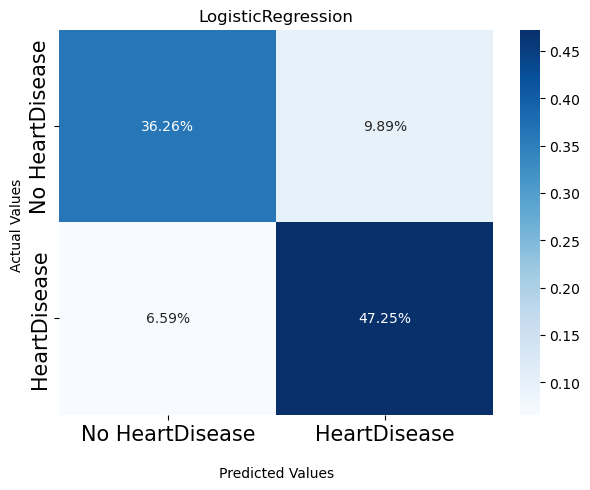

In [124]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = "liblinear")

best_max_features = None
best_score = 0

for max_features in max_features_range:
    selector = SelectFromModel(estimator=logreg, threshold=-np.inf, max_features=max_features)
    selector.fit(x_train, y_train)
    x_train_selected = selector.transform(x_train)
    
    scores = cross_val_score(LogisticRegression(solver = "liblinear"), 
                             x_train_selected, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    print(max_features,'features',' = ',mean_score)
    if mean_score > best_score:
        best_score = mean_score
        best_max_features = max_features

print("最佳的 max_features 值:", best_max_features)
print("對應的交叉驗證分數:", best_score)


selector = SelectFromModel(estimator=logreg, threshold=-np.inf, max_features=best_max_features)
selector.fit(x_train, y_train)

print()

selected_features = np.array(data.drop('output', axis=1).columns)[selector.get_support()]
feature_selection_count.update(selected_features)
print("選擇的特徵:", selected_features)

print()

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

logreg.fit(x_train_selected, y_train)


y_pred_prob = logreg.predict_proba(x_test_selected)[:, 1]
threshold = 0.4
y_pred = (y_pred_prob >= threshold).astype(int)

evaluate_model(logreg, y_test, y_pred)
print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'Precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')

print()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
plt.title('LogisticRegression')
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
plt.show()

1 features  =  0.7511670480549199
2 features  =  0.7047139588100686
3 features  =  0.7893478260869564
4 features  =  0.79
5 features  =  0.7890846681922197
6 features  =  0.7779061784897024
7 features  =  0.7505148741418765
8 features  =  0.7896109839816934
9 features  =  0.7738215102974828
10 features  =  0.7896109839816933
11 features  =  0.7740503432494279
12 features  =  0.8001372997711671
最佳的 max_features 值: 12
對應的交叉驗證分數: 0.8001372997711671

選擇的特徵: ['age' 'sex' 'cp' 'trtbps' 'chol' 'restecg' 'thalachh' 'exng' 'oldpeak'
 'slp' 'caa' 'thall']

Accuracy_score: 0.8461538461538461
Precision_score: 0.8301886792452831
Recall_score: 0.8979591836734694
F1-score: 0.8627450980392157



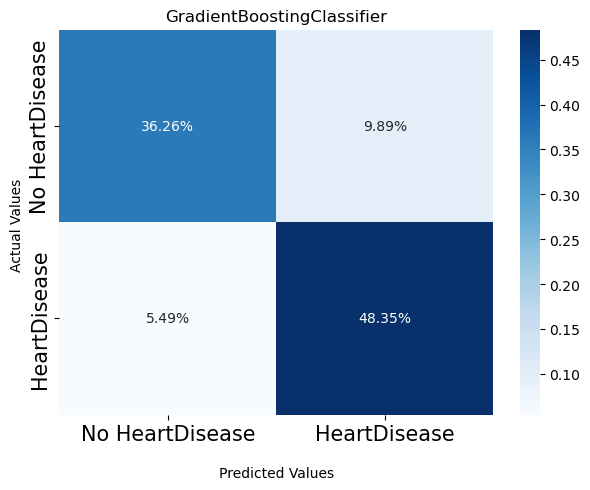

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=50,max_depth = 3)

best_max_features = None
best_score = 0

for max_features in max_features_range:
    selector = SelectFromModel(estimator=gbc, threshold=-np.inf, max_features=max_features)
    selector.fit(x_train, y_train)
    x_train_selected = selector.transform(x_train)

    scores = cross_val_score(GradientBoostingClassifier(n_estimators=50,max_depth = 3), 
                             x_train_selected, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    print(max_features,'features',' = ',mean_score)
    if mean_score > best_score:
        best_score = mean_score
        best_max_features = max_features

print("最佳的 max_features 值:", best_max_features)
print("對應的交叉驗證分數:", best_score)


selector = SelectFromModel(estimator=gbc, threshold=-np.inf, max_features=best_max_features)
selector.fit(x_train, y_train)

print()

selected_features = np.array(data.drop('output', axis=1).columns)[selector.get_support()]
feature_selection_count.update(selected_features)
print("選擇的特徵:", selected_features)

print()

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

gbc.fit(x_train_selected, y_train)


y_pred_prob = gbc.predict_proba(x_test_selected)[:, 1]
threshold = 0.4
y_pred = (y_pred_prob >= threshold).astype(int)

evaluate_model(gbc, y_test, y_pred)
print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'Precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')

print()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
plt.title('GradientBoostingClassifier')
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
plt.show()

1 features  =  0.7511670480549199
2 features  =  0.7483867276887872
3 features  =  0.8371739130434783
4 features  =  0.7813386727688787
5 features  =  0.8023913043478261
6 features  =  0.8380892448512587
7 features  =  0.8424370709382151
8 features  =  0.8328260869565216
9 features  =  0.833741418764302
10 features  =  0.8188672768878718
11 features  =  0.8234782608695653
12 features  =  0.8092562929061785
最佳的 max_features 值: 7
對應的交叉驗證分數: 0.8424370709382151

選擇的特徵: ['cp' 'thalachh' 'exng' 'oldpeak' 'slp' 'caa' 'thall']

Accuracy_score: 0.8241758241758241
Precision_score: 0.8
Recall_score: 0.8979591836734694
F1-score: 0.8461538461538463



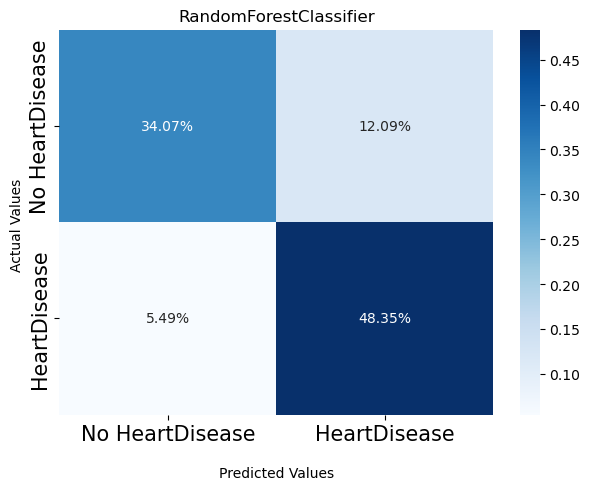

In [126]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=25,max_depth = 3)

best_max_features = None
best_score = 0

for max_features in max_features_range:
    selector = SelectFromModel(estimator=rfc, threshold=-np.inf, max_features=max_features)
    selector.fit(x_train, y_train)
    x_train_selected = selector.transform(x_train)
    
    scores = cross_val_score(RandomForestClassifier(n_estimators=50,max_depth = 3), 
                             x_train_selected, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    print(max_features,'features',' = ',mean_score)
    if mean_score > best_score:
        best_score = mean_score
        best_max_features = max_features

print("最佳的 max_features 值:", best_max_features)
print("對應的交叉驗證分數:", best_score)


selector = SelectFromModel(estimator=rfc, threshold=-np.inf, max_features=best_max_features)
selector.fit(x_train, y_train)

print()

selected_features = np.array(data.drop('output', axis=1).columns)[selector.get_support()]
feature_selection_count.update(selected_features)
print("選擇的特徵:", selected_features)

print()

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

rfc.fit(x_train_selected, y_train)


y_pred_prob = rfc.predict_proba(x_test_selected)[:, 1]
threshold = 0.47
y_pred = (y_pred_prob >= threshold).astype(int)

evaluate_model(rfc, y_test, y_pred)
print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'Precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')

print()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
plt.title('RandomForestClassifier')
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
plt.show()

1 features  =  0.7511670480549199
2 features  =  0.7099771167048056
3 features  =  0.6989931350114416
4 features  =  0.7645995423340961
5 features  =  0.7316819221967963
6 features  =  0.7074599542334097
7 features  =  0.7058581235697939
8 features  =  0.7039016018306636
9 features  =  0.7077231121281464
10 features  =  0.7065446224256294
11 features  =  0.7042906178489702
12 features  =  0.7246910755148741
最佳的 max_features 值: 4
對應的交叉驗證分數: 0.7645995423340961

選擇的特徵: ['cp' 'oldpeak' 'caa' 'thall']

Accuracy_score: 0.7692307692307693
Precision_score: 0.78
Recall_score: 0.7959183673469388
F1-score: 0.7878787878787878



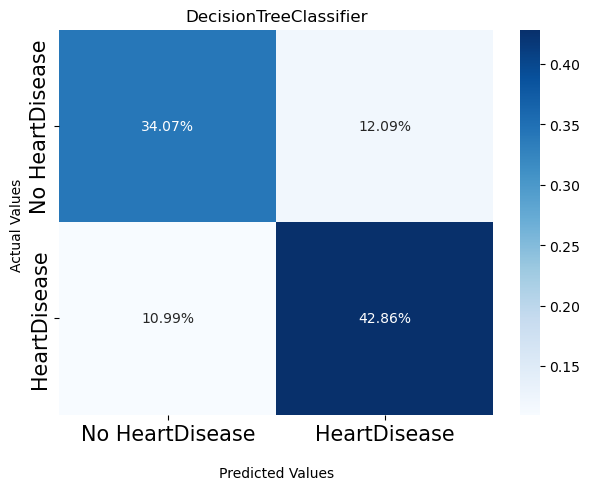

In [127]:
from sklearn.tree import DecisionTreeClassifier

dtc =  DecisionTreeClassifier(max_depth= 200)

best_max_features = None
best_score = 0

for max_features in max_features_range:
    selector = SelectFromModel(estimator=dtc, threshold=-np.inf, max_features=max_features)
    selector.fit(x_train, y_train)
    x_train_selected = selector.transform(x_train)
    
    scores = cross_val_score(DecisionTreeClassifier(max_depth= 8), 
                             x_train_selected, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    print(max_features,'features',' = ',mean_score)
    if mean_score > best_score:
        best_score = mean_score
        best_max_features = max_features

print("最佳的 max_features 值:", best_max_features)
print("對應的交叉驗證分數:", best_score)


selector = SelectFromModel(estimator=dtc, threshold=-np.inf, max_features=best_max_features)
selector.fit(x_train, y_train)

print()

selected_features = np.array(data.drop('output', axis=1).columns)[selector.get_support()]
feature_selection_count.update(selected_features)
print("選擇的特徵:", selected_features)

print()

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

dtc.fit(x_train_selected, y_train)


y_pred = dtc.predict(x_test_selected)
evaluate_model(dtc, y_test, y_pred)
print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'Precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')

print()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
plt.title('DecisionTreeClassifier')
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
plt.show()

1 features  =  0.5986041189931349
2 features  =  0.562745995423341
3 features  =  0.5573569794050343
4 features  =  0.7153775743707094
5 features  =  0.6927231121281465
6 features  =  0.7569565217391305
7 features  =  0.7516933638443936
8 features  =  0.7622196796338673
9 features  =  0.73220823798627
10 features  =  0.7427345537757436
11 features  =  0.7470823798627002
12 features  =  0.7672196796338674
最佳的 max_features 值: 12
對應的交叉驗證分數: 0.7672196796338674

選擇的特徵: ['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa']

Accuracy_score: 0.8461538461538461
Precision_score: 0.8888888888888888
Recall_score: 0.8163265306122449
F1-score: 0.851063829787234



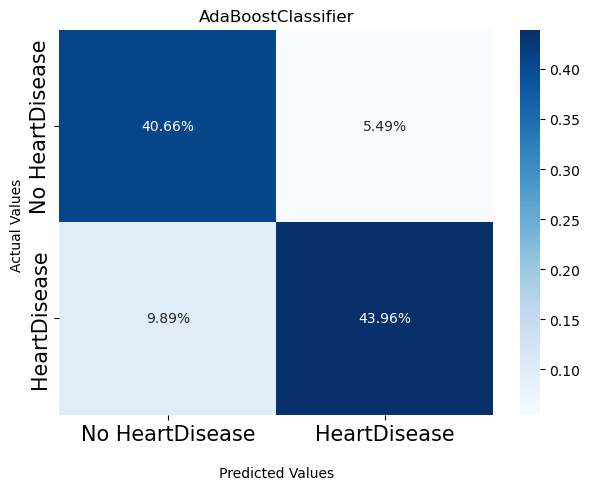

In [128]:
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier(n_estimators = 25)

best_max_features = None
best_score = 0

for max_features in max_features_range:
    selector = SelectFromModel(estimator=Ada, threshold=-np.inf, max_features=max_features)
    selector.fit(x_train, y_train)
    x_train_selected = selector.transform(x_train)
    
    scores = cross_val_score(AdaBoostClassifier(n_estimators = 25), 
                             x_train_selected, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    print(max_features,'features',' = ',mean_score)
    if mean_score > best_score:
        best_score = mean_score
        best_max_features = max_features

print("最佳的 max_features 值:", best_max_features)
print("對應的交叉驗證分數:", best_score)


selector = SelectFromModel(estimator=Ada, threshold=-np.inf, max_features=best_max_features)
selector.fit(x_train, y_train)

print()

selected_features = np.array(data.drop('output', axis=1).columns)[selector.get_support()]
feature_selection_count.update(selected_features)
print("選擇的特徵:", selected_features)

print()

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

Ada.fit(x_train_selected, y_train)


y_pred_prob = Ada.predict_proba(x_test_selected)[:, 1]
threshold = 0.498
y_pred = (y_pred_prob >= threshold).astype(int)

evaluate_model(Ada, y_test, y_pred)
print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'Precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')

print()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
plt.title('AdaBoostClassifier')
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'],fontsize = 15)
plt.show()

In [129]:
results_df = pd.DataFrame({
    'Model': ['XGBClassifier', 'LogisticRegression', 'GradientBoostingClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier'],
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'AUC': auc
})

styled_df = results_df
styled_df

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,XGBClassifier,0.835165,0.826923,0.877551,0.851485,0.831633
1,LogisticRegression,0.835165,0.826923,0.877551,0.851485,0.831633
2,GradientBoostingClassifier,0.846154,0.830189,0.897959,0.862745,0.841837
3,RandomForestClassifier,0.824176,0.800000,0.897959,0.846154,0.818027
4,DecisionTreeClassifier,0.769231,0.780000,0.795918,0.787879,0.767007
5,AdaBoostClassifier,0.846154,0.888889,0.816327,0.851064,0.848639


In [130]:
sorted_feature_selection = feature_selection_count.most_common()
print("每個特徵被選擇的次數:")
for feature, count in sorted_feature_selection:
    print(f"{feature}: {count}")

每個特徵被選擇的次數:
cp: 6
oldpeak: 6
caa: 6
thalachh: 5
exng: 5
slp: 5
thall: 5
age: 3
sex: 3
trtbps: 3
chol: 2
restecg: 2
fbs: 1
